<span style="color:blue"> ***Do one hot encoding on the Job_Category column***</span>

In [145]:
import pandas as pd
df = pd.read_csv("German_Credit_Preped.csv")
df

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9671059,none,12,current loans paid,furniture/equipment,1736,< 100 DM,4 - 7 years,3,female-divorced/separated/married,...,real estate,31,none,own,1,unskilled-resident,1,none,yes,0
996,2180183,< 0 DM,30,current loans paid,car (used),3857,< 100 DM,1 - 4 years,4,male-divorced/separated,...,building society savings/life insurance,40,none,own,1,highly skilled,1,yes,yes,0
997,3130615,none,12,current loans paid,radio/television,804,< 100 DM,>= 7 years,4,male-single,...,car or other,38,none,own,1,skilled,1,none,yes,0
998,6267789,< 0 DM,45,current loans paid,radio/television,1845,< 100 DM,1 - 4 years,4,male-single,...,unknown-none,23,none,for free,1,skilled,1,yes,yes,1


In [146]:
df.bad_credit.value_counts()

0    700
1    300
Name: bad_credit, dtype: int64

In [147]:
df = df[['loan_duration_mo','loan_amount','payment_pcnt_income','age_yrs','job_category','bad_credit']]
df

,loan_duration_mo,loan_amount,payment_pcnt_income,age_yrs,job_category,bad_credit
0,6,1169,4,67,skilled,0
1,48,5951,2,22,skilled,1
2,12,2096,2,49,unskilled-resident,0
3,42,7882,2,45,skilled,0
4,24,4870,3,53,skilled,1
...,...,...,...,...,...,...
995,12,1736,3,31,unskilled-resident,0
996,30,3857,4,40,highly skilled,0
997,12,804,4,38,skilled,0
998,45,1845,4,23,skilled,1


In [148]:
df['job_category'].value_counts()

skilled                              630
unskilled-resident                   200
highly skilled                       148
unemployed-unskilled-non-resident     22
Name: job_category, dtype: int64

<span style="color:blue"> ****Doing one hot encoding****</span>

In [149]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['job_category']]).toarray())
# merge with main df bridge_df on key values
df = df.join(enc_df)<span style="color:blue"> ***Doing one hot encoding***</span>
#df =df.rename(columns={'0':'df','1': 'a', '2': 'c','3':'v'} )
df
#enc_df


,loan_duration_mo,loan_amount,payment_pcnt_income,age_yrs,job_category,bad_credit,0,1,2,3
0,6,1169,4,67,skilled,0,0.0,1.0,0.0,0.0
1,48,5951,2,22,skilled,1,0.0,1.0,0.0,0.0
2,12,2096,2,49,unskilled-resident,0,0.0,0.0,0.0,1.0
3,42,7882,2,45,skilled,0,0.0,1.0,0.0,0.0
4,24,4870,3,53,skilled,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,unskilled-resident,0,0.0,0.0,0.0,1.0
996,30,3857,4,40,highly skilled,0,1.0,0.0,0.0,0.0
997,12,804,4,38,skilled,0,0.0,1.0,0.0,0.0
998,45,1845,4,23,skilled,1,0.0,1.0,0.0,0.0


In [150]:
df = df.drop(['job_category'], axis=1)
df.columns

Index([   'loan_duration_mo',         'loan_amount', 'payment_pcnt_income',
                   'age_yrs',          'bad_credit',                     0,
                           1,                     2,                     3],
      dtype='object')

In [153]:
features_col = ['loan_duration_mo','loan_amount','payment_pcnt_income','age_yrs',0,1,2,3]

In [154]:
X = df[features_col]
y = df['bad_credit']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.25,random_state=0)

In [156]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [157]:
#fit the model
logreg.fit(X_train,y_train)

LogisticRegression()

In [159]:
#predicting x_test
y_pred=logreg.predict(X_test)

In [160]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [161]:
#confusion_matrix
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[171,   3],
       [ 67,   9]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

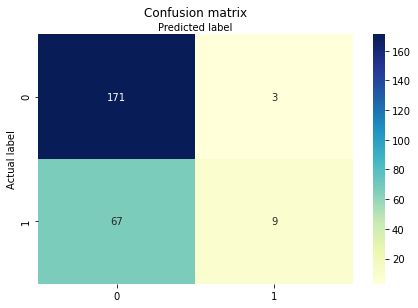

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [163]:
#accuracy metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.72


In [164]:
#f1 
print("F1_score:",metrics.f1_score(y_test, y_pred))

F1_score: 0.20454545454545453


In [165]:
#precision metrics
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.75


In [166]:
#recall metrics
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.11842105263157894


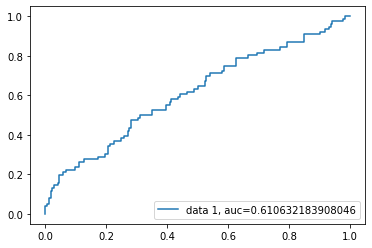

In [167]:
#ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()